# 01 User defines study area

* Current version: polygon derived from Faxe data
* Future version: user-defined polygon for any region in DK

In [1]:
import os
# os.environ['USE_PYGEOS'] = '0' # pygeos/shapely2.0/osmnx conflict solving
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

In [2]:
edges = gpd.read_file("../data/raw/faxe_beta/stretch.shp")

In [3]:
# The user-defined area will be a 500 meter buffer around all edges
study_area_polygon = edges.unary_union.convex_hull.buffer(500)
study_area_gdf = gpd.GeoDataFrame({"geometry":[study_area_polygon]},crs=edges.crs)

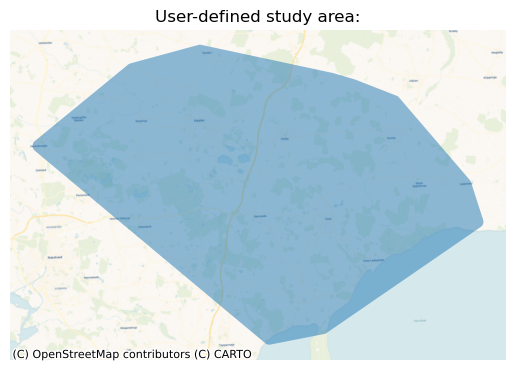

In [4]:
# Show a plot of the study area
fig, ax = plt.subplots(1,1)
study_area_gdf.plot(ax=ax, alpha = 0.5)
cx.add_basemap(ax=ax, crs = study_area_gdf.crs, source=cx.providers.CartoDB.Voyager)
ax.set_axis_off()
ax.set_title("User-defined study area:")
plt.show()

In [5]:
# save to file
os.makedirs("../data/raw/user_input", exist_ok=True)
study_area_gdf.to_file("../data/raw/user_input/study_area.gpkg", index = False)